In [ ]:
#step 1: import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from numpy import math
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import missingno as msn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
from zipfile import ZipFile

As out dataset is a zip file of 8 different CSV files for 8 different Languages let's first unzip it, and concatenate all CSV files.

In [ ]:
# create an empty list to store the dataframes
li = []
# open the zip file
with ZipFile('/content/drive/MyDrive/archive.zip') as zf:
    # loop through each file in the zip file
    for filename in zf.namelist():
        # check if the file is a csv file
        if filename.endswith('.csv'):
            # read the csv file as a pandas dataframe
            df = pd.read_csv(zf.open(filename))
            # append the dataframe to the list
            li.append(df)
# concatenate all the dataframes in the list
df = pd.concat(li, ignore_index=True)

Now let's perform some Exploratory Data Analysis.

In [ ]:
df.columns

Index(['Unnamed: 0', 'name', 'badge', 'rating', 'reviews_number', 'usd_price',
       'language', 'active_students', 'lessons_number', 'speak', 'description',
       'link'],
      dtype='object')

The code snippet msn.matrix(df) is using the missingno library to create a matrix visualization of missing values in the DataFrame df. This visualization helps to quickly identify the patterns of missing data across different columns.

Here's what the visualization indicates:

Empty White Lines: Each horizontal line represents a row in the DataFrame, and the empty white spaces in these lines indicate missing values in the corresponding columns.

Dark Bars: The vertical bars on the right side of the matrix represent the completeness of each column. A dark bar means there are no missing values in that column, while a lighter bar indicates the presence of missing values.

<Axes: >

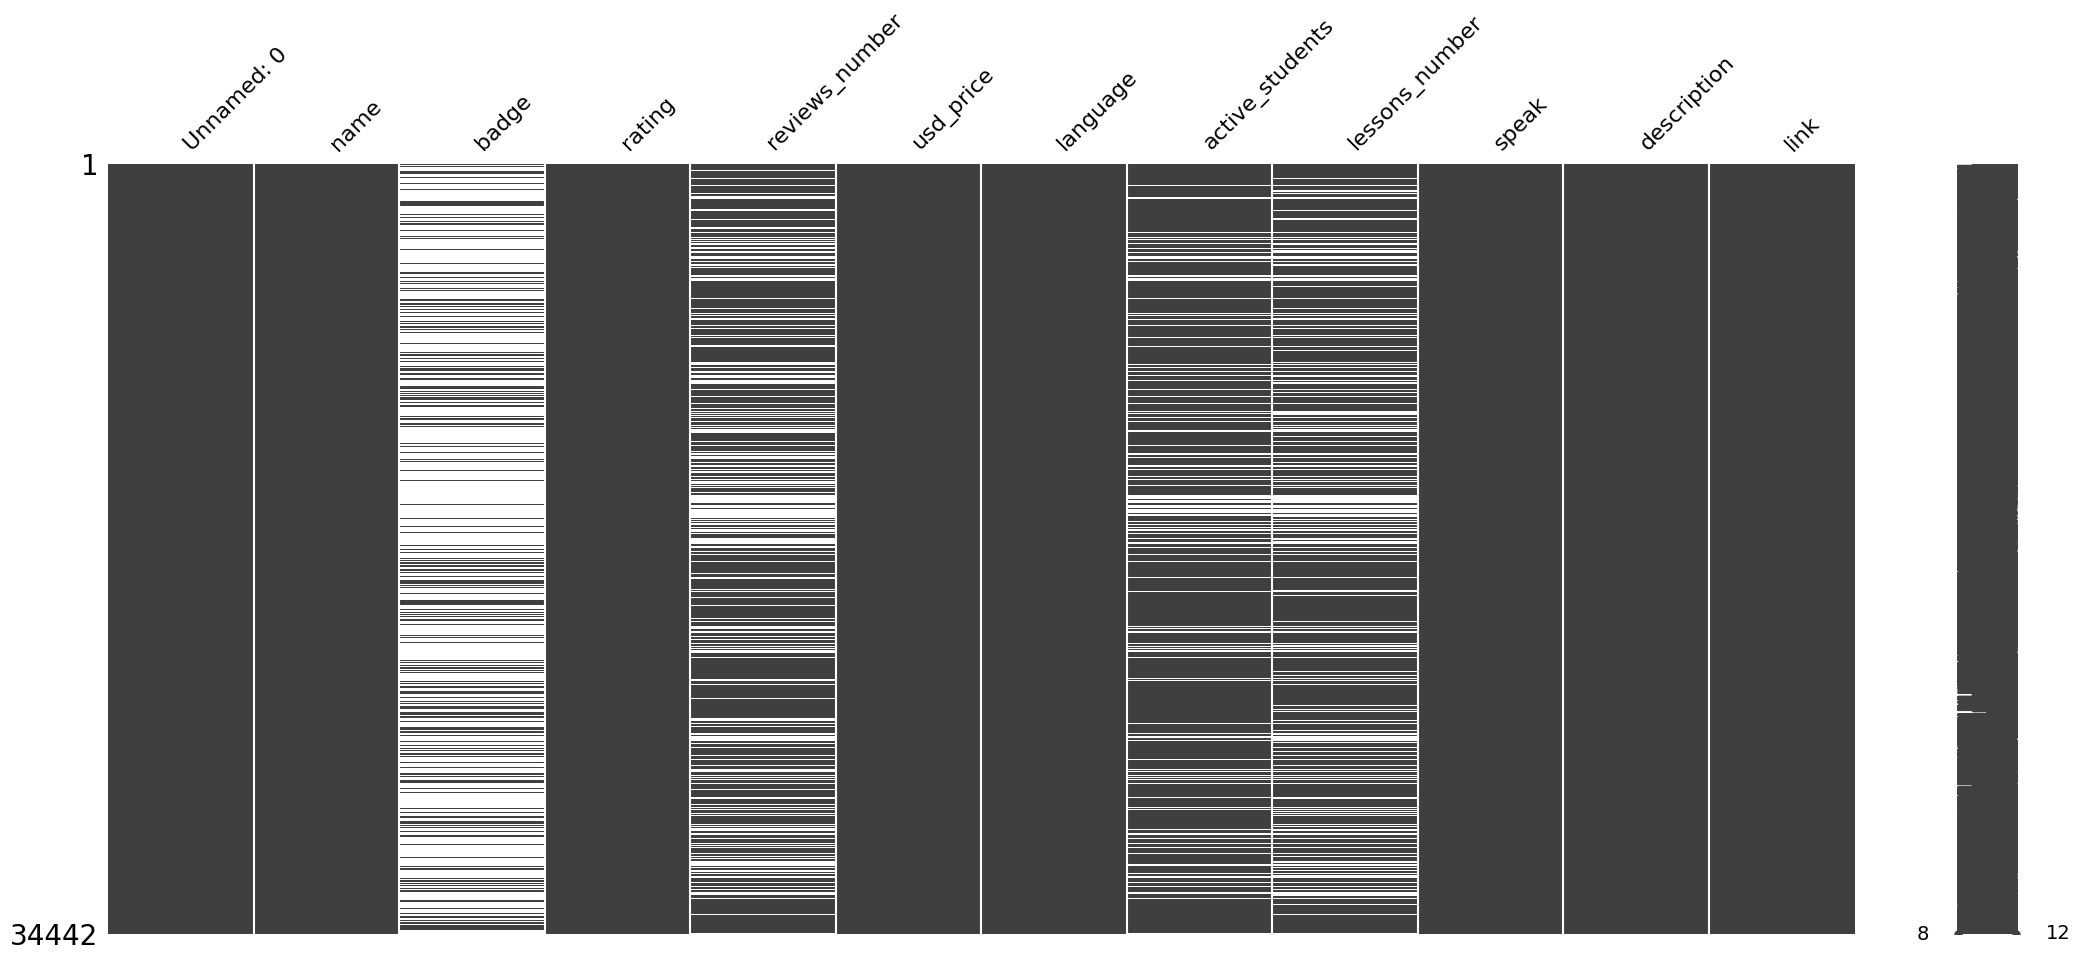

In [ ]:
msn.matrix(df)

In [ ]:
#let's figure out how many languages do we have in the dataframe,
df['language'].value_counts()

English     16716
Spanish      6098
Chinese      3144
Arabic       2071
French       2013
Italian      1576
Japanese     1284
German        926
Korean        614
Name: language, dtype: int64

In [ ]:
#let's find number of tutors who have super tutor badge
df['badge'].value_counts()

Super tutor    9284
Name: badge, dtype: int64

In [ ]:
df.head() #prints first 5 rows

,Unnamed: 0,name,badge,rating,reviews_number,usd_price,language,active_students,lessons_number,speak,description,link
0,0,Mahmoud H.,NaN,4.8,28.0,25,Arabic,8.0,8382.0,"Arabic (Native), English (Advanced)","َ📜EJAZA For Quran,Arabic,15 years Experience🎓a...",https://preply.com/en/tutor/61569
1,1,Dr. Abdul M.,NaN,5,10.0,12,Arabic,24.0,1384.0,"Arabic (Proficient), English (Proficient)",Doctorate in Arabic with 5 years of experience...,https://preply.com/en/tutor/31502
2,2,Atika M.,Super tutor,4.8,101.0,20,Arabic,14.0,4963.0,"Arabic (Native), English (Proficient)",Certified tutor with 7 years of Online teachin...,https://preply.com/en/tutor/45713
3,3,Abdelghafour R.,NaN,4.9,19.0,18,Arabic,4.0,1337.0,"Arabic (Native), English (Advanced)","Certified Tutor of Arabic and French , native...",https://preply.com/en/tutor/21749
4,4,Muhammad M.,Super tutor,5,38.0,18,Arabic,17.0,3039.0,"Arabic (Native), English (Advanced)",Certified tutor with 8 years of experience tea...,https://preply.com/en/tutor/39825


In [ ]:
df.describe()

,Unnamed: 0,reviews_number,usd_price,active_students,lessons_number
count,34442.000000,24078.000000,34442.000000,28899.000000,25284.000000
mean,4938.282736,13.918266,15.761977,16.454203,882.523849
std,4852.090132,18.623789,10.554000,53.447999,1324.630284
min,0.000000,1.000000,3.000000,1.000000,1.000000
25%,1010.000000,3.000000,8.000000,2.000000,87.000000
50%,2912.000000,8.000000,15.000000,8.000000,382.000000
75%,8104.750000,18.000000,20.000000,18.000000,1121.000000
max,16715.000000,336.000000,100.000000,3218.000000,18192.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34442 entries, 0 to 34441
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       34442 non-null  int64  
 1   name             34442 non-null  object 
 2   badge            9284 non-null   object 
 3   rating           34442 non-null  object 
 4   reviews_number   24078 non-null  float64
 5   usd_price        34442 non-null  int64  
 6   language         34442 non-null  object 
 7   active_students  28899 non-null  float64
 8   lessons_number   25284 non-null  float64
 9   speak            34442 non-null  object 
 10  description      34442 non-null  object 
 11  link             34442 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 3.2+ MB


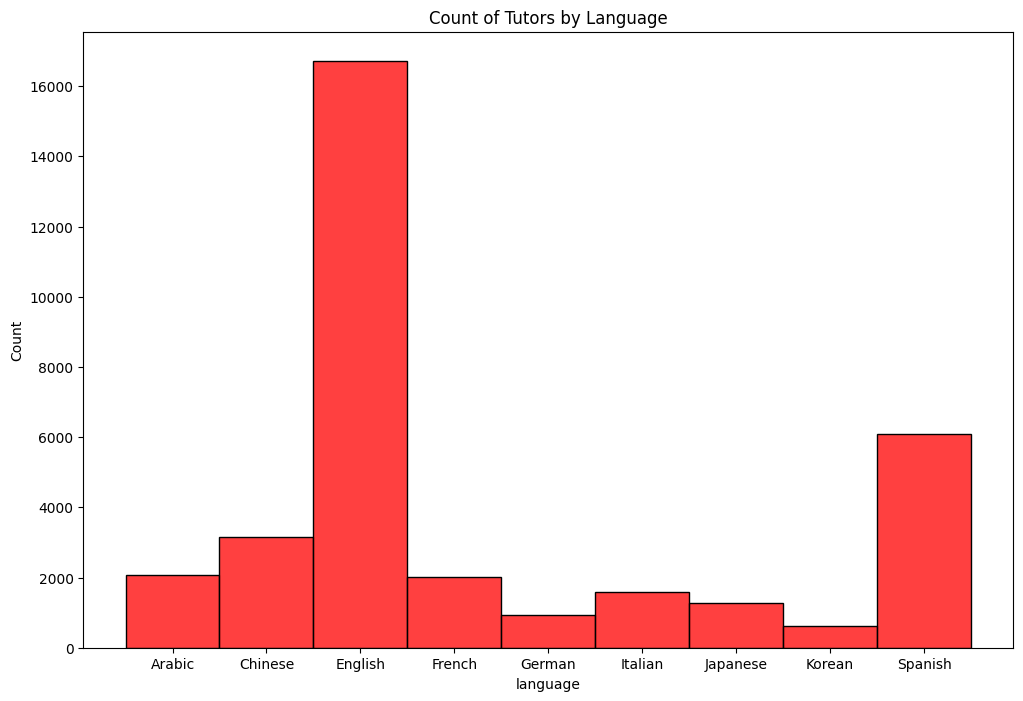

In [ ]:
#Now let's visualize the most common languages for tutors
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='language', color='red', kde=False)  # 'red' is the color
plt.title('Count of Tutors by Language')
plt.show()

let's figure out the correlation between price per lesson and amount of lessons the tutor has. Obviously, more lessons a tutor has more more experience and price he|she could gain. However, from the plot below we figured out that this correlation is more stronger for Arabic. And French, for instance, has the weakest correlation. English btw is at the same positions as Chinese.

sns.scatterplot is used to create a scatter plot with points colored by the 'language' column.

sns.regplot is then used to add a linear regression trendline to the scatter plot.

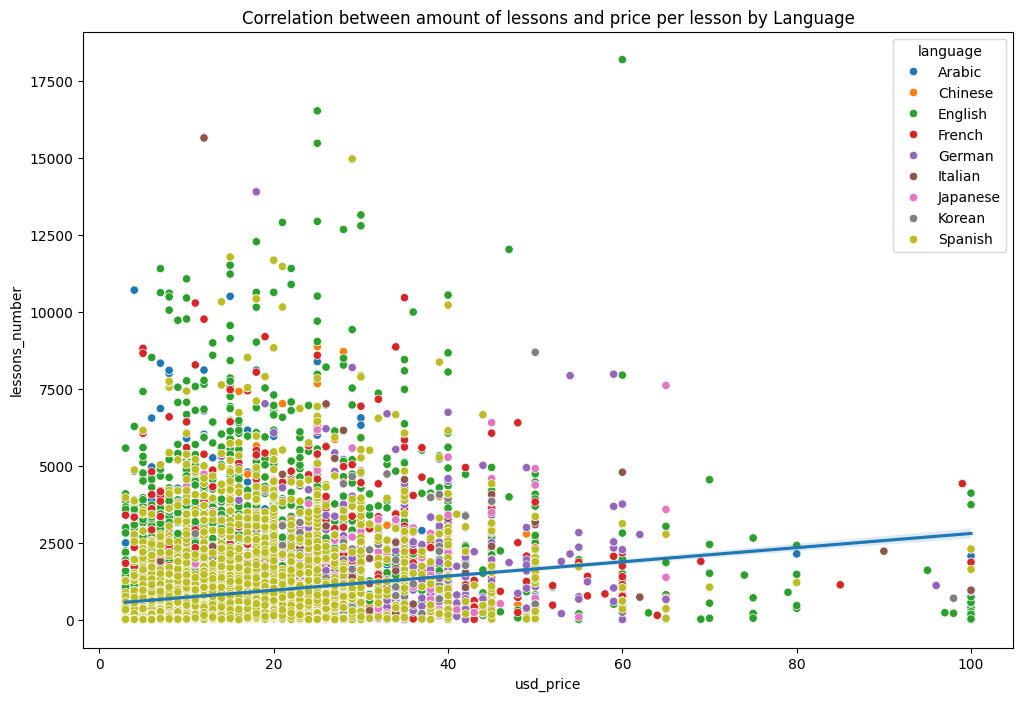

In [ ]:
# Create the scatter plot with trendline
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=df, x='usd_price', y='lessons_number', hue='language')
sns.regplot(data=df, x='usd_price', y='lessons_number', scatter=False, ax=scatter_plot)
# Set plot title
plt.title('Correlation between amount of lessons and price per lesson by Language')
# Show the plot
plt.show()

In [ ]:
#let us visualize 'Active students amount by Languages'
fig = px.histogram(df, x='language', y='active_students',
                   color_discrete_sequence=['#e377c2'], title='Active students amount by Languages')
fig.show()

In [131]:
# Let us viisualize "Average price for tutor's lesson without any reviews by languages" which is nothing but new tutors.
import plotly.express as px
new_tutors_prices = df[df['rating']=='New'][['language','usd_price','lessons_number']].groupby('language').mean().reset_index()
fig = px.histogram(new_tutors_prices, x='language',y='usd_price', color_discrete_sequence=['#e377c2'],
                  title="Average price for tutor's lesson without any reviews by languages")
fig.show()

The average price for tutor's lesson without any reviews by languages. From this plot we can learn that lesson with 0 reviews in German is twice more expensive that in English.

let's see the correlation between amount of lessons and price that is set by the tutor. In other words - what language tutors are more likely to increase price per lesson. According to the dataset collected, Japanese tutors like to increase the price most of all when they got many students and Arabic tutors, for example, don't usually increase the price for a lesson.


In [ ]:
fig = px.scatter(df, x='lessons_number',y='usd_price', trendline = 'ols', color = 'language',
                title = 'Lesson Price Increasement by Lessons Amount')
fig.show()

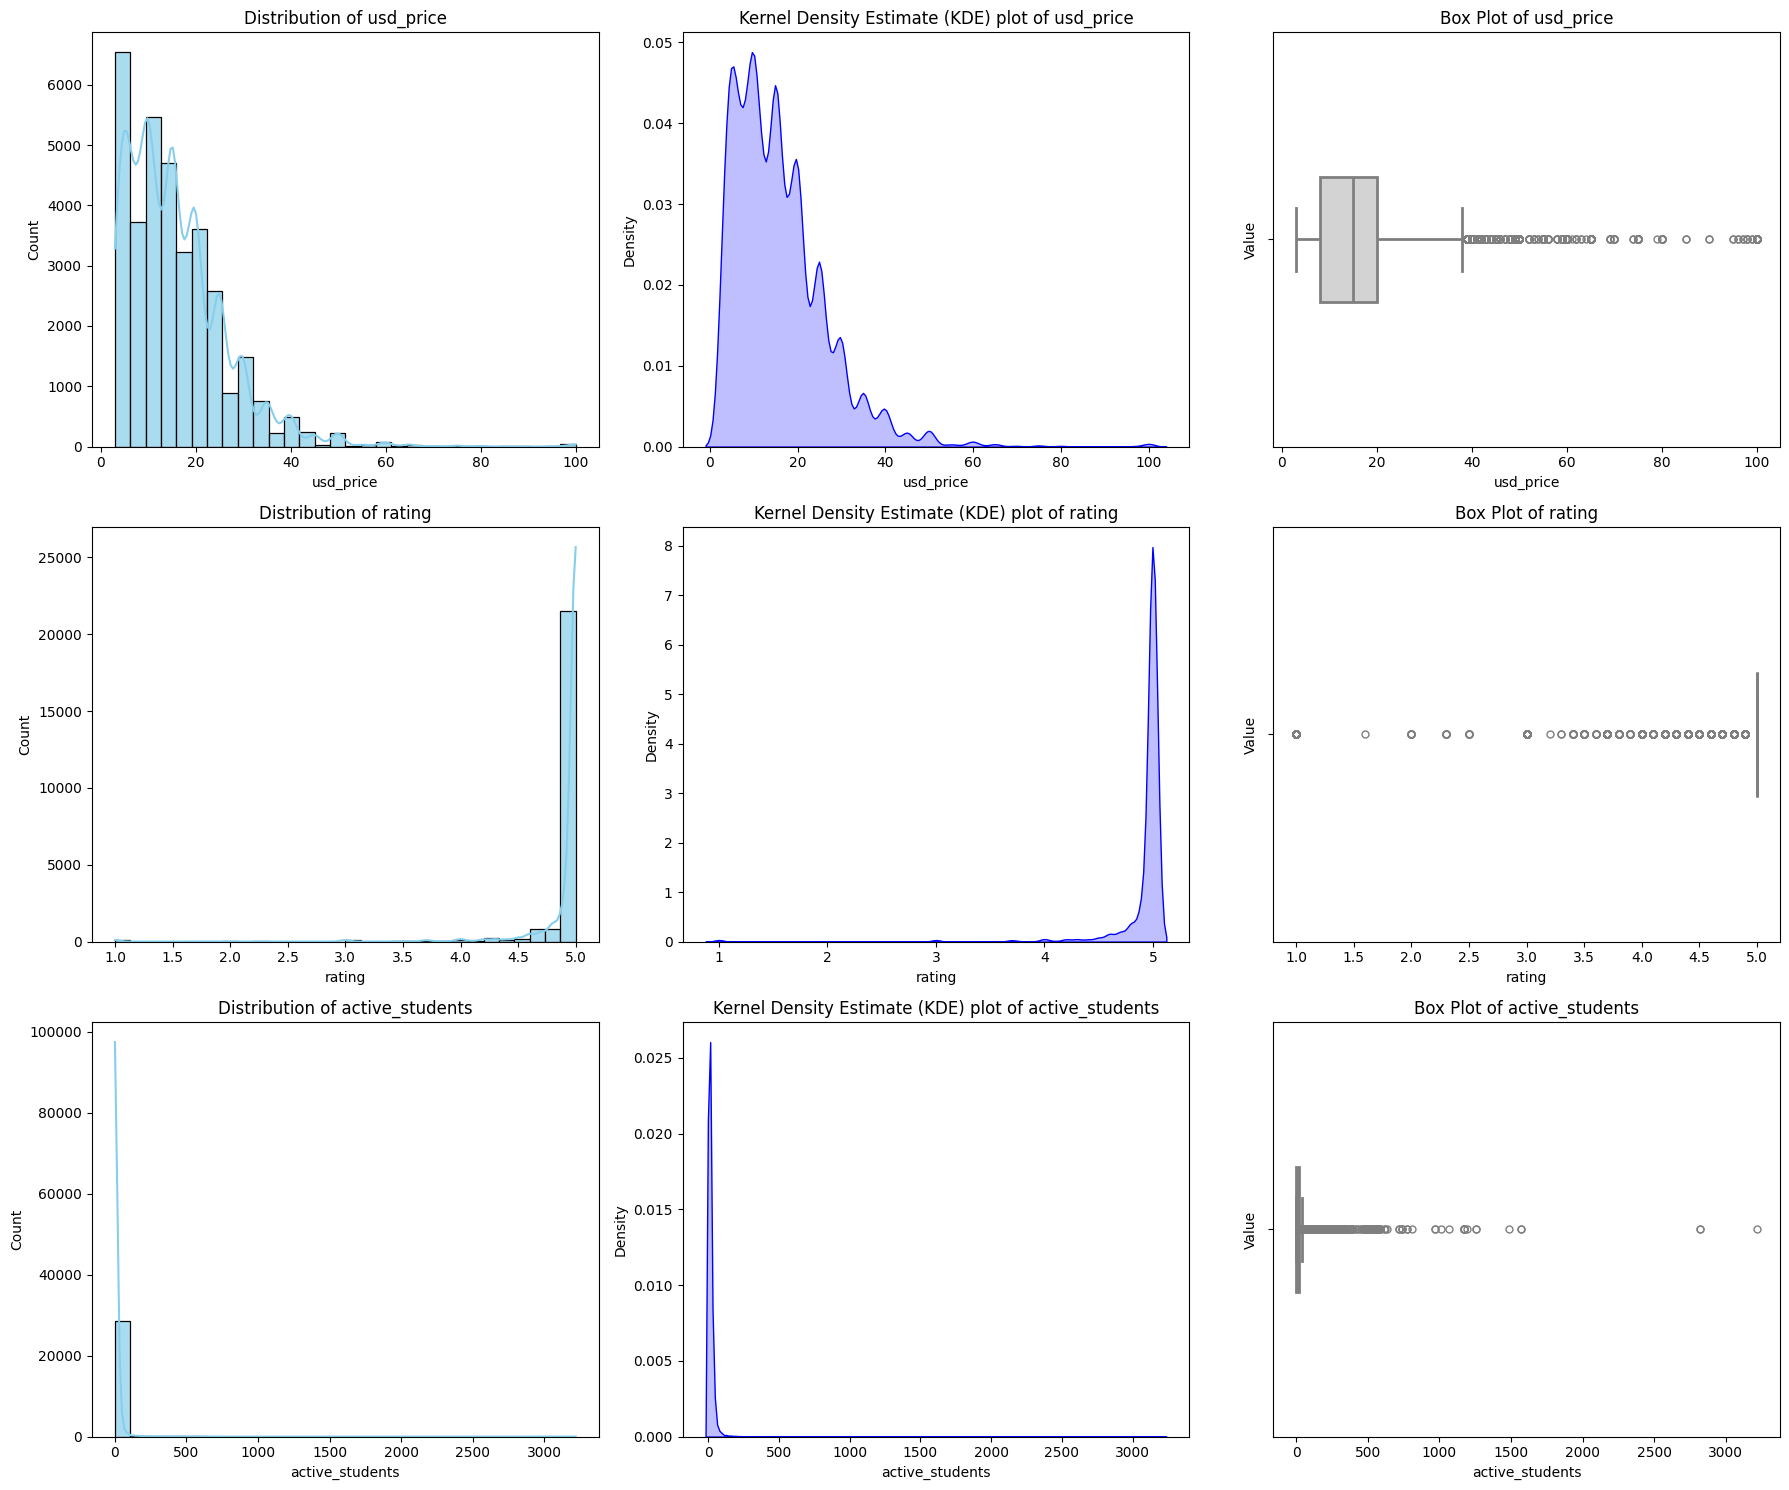

In [ ]:

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Plot for 'usd_price'
sns.histplot(df['usd_price'], bins=30, kde=True, color='skyblue', alpha=0.7, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of usd_price')
axes[0, 0].set_xlabel('usd_price')
axes[0, 0].set_ylabel('Count')

sns.kdeplot(df['usd_price'], color='blue', fill=True, ax=axes[0, 1])
axes[0, 1].set_title('Kernel Density Estimate (KDE) plot of usd_price')
axes[0, 1].set_xlabel('usd_price')
axes[0, 1].set_ylabel('Density')

sns.boxplot(x=df['usd_price'], color='lightgray', width=0.3, linewidth=2, fliersize=5, ax=axes[0, 2])
axes[0, 2].set_title('Box Plot of usd_price')
axes[0, 2].set_xlabel('usd_price')
axes[0, 2].set_ylabel('Value')

# Plot for 'rating'
# Convert 'rating' column to numeric data type
dff = pd.DataFrame(df['rating'], columns=['rating'])
dff['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Plot for 'rating'
sns.histplot(dff['rating'], bins=30, kde=True, color='skyblue', alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of rating')
axes[1, 0].set_xlabel('rating')
axes[1, 0].set_ylabel('Count')

sns.kdeplot(dff['rating'], color='blue', fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Kernel Density Estimate (KDE) plot of rating')
axes[1, 1].set_xlabel('rating')
axes[1, 1].set_ylabel('Density')

sns.boxplot(x=dff['rating'], color='lightgray', width=0.3, linewidth=2, fliersize=5, ax=axes[1, 2])
axes[1, 2].set_title('Box Plot of rating')
axes[1, 2].set_xlabel('rating')
axes[1, 2].set_ylabel('Value')

# Plot for 'active_students'
sns.histplot(df['active_students'], bins=30, kde=True, color='skyblue', alpha=0.7, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of active_students')
axes[2, 0].set_xlabel('active_students')
axes[2, 0].set_ylabel('Count')

sns.kdeplot(df['active_students'], color='blue', fill=True, ax=axes[2, 1])
axes[2, 1].set_title('Kernel Density Estimate (KDE) plot of active_students')
axes[2, 1].set_xlabel('active_students')
axes[2, 1].set_ylabel('Density')

sns.boxplot(x=df['active_students'], color='lightgray', width=0.3, linewidth=2, fliersize=5, ax=axes[2, 2])
axes[2, 2].set_title('Box Plot of active_students')
axes[2, 2].set_xlabel('active_students')
axes[2, 2].set_ylabel('Value')

plt.tight_layout()
plt.show()


Now Let us prepare a model which is a lesson's price Recommendation System:

Target Variable: 'usd_variablle'
Create a recommendation system to predict price of lessons for students based on their preferences, tutor availability, language, and other factors..


In [ ]:
#one-hot encode categorical variables in the DataFrame df with the columns 'badge' and 'language'. It transforms categorical variables into binary vectors.
df_encoded = pd.get_dummies(df, columns=['badge', 'language'])
df_encoded

,Unnamed: 0,name,rating,reviews_number,usd_price,active_students,lessons_number,speak,description,link,badge_Super tutor,language_Arabic,language_Chinese,language_English,language_French,language_German,language_Italian,language_Japanese,language_Korean,language_Spanish
0,0,Mahmoud H.,4.8,28.0,25,8.0,8382.0,"Arabic (Native), English (Advanced)","َ📜EJAZA For Quran,Arabic,15 years Experience🎓a...",https://preply.com/en/tutor/61569,0,1,0,0,0,0,0,0,0,0
1,1,Dr. Abdul M.,5,10.0,12,24.0,1384.0,"Arabic (Proficient), English (Proficient)",Doctorate in Arabic with 5 years of experience...,https://preply.com/en/tutor/31502,0,1,0,0,0,0,0,0,0,0
2,2,Atika M.,4.8,101.0,20,14.0,4963.0,"Arabic (Native), English (Proficient)",Certified tutor with 7 years of Online teachin...,https://preply.com/en/tutor/45713,1,1,0,0,0,0,0,0,0,0
3,3,Abdelghafour R.,4.9,19.0,18,4.0,1337.0,"Arabic (Native), English (Advanced)","Certified Tutor of Arabic and French , native...",https://preply.com/en/tutor/21749,0,1,0,0,0,0,0,0,0,0
4,4,Muhammad M.,5,38.0,18,17.0,3039.0,"Arabic (Native), English (Advanced)",Certified tutor with 8 years of experience tea...,https://preply.com/en/tutor/39825,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34437,6093,Fernanda R.,5,9.0,26,10.0,1139.0,"Spanish (Native), English (Upper-Intermediate)",Enjoy and Learn Spanish with a Latina with 7 y...,https://preply.com/en/tutor/345142,1,0,0,0,0,0,0,0,0,1
34438,6094,Claudia S.,5,2.0,19,3.0,103.0,"Spanish (Native), English (Upper-Intermediate)",Guatemalan Spanish teacher with over 30 years ...,https://preply.com/en/tutor/1157203,0,0,0,0,0,0,0,0,0,1
34439,6095,Leidy carolina A.,New,NaN,6,NaN,NaN,Spanish (Native),Dare and learn Spanish with me in dynamic and ...,/es/profesor/3544272,0,0,0,0,0,0,0,0,0,1
34440,6096,María Natalia G.,5,1.0,6,2.0,24.0,"Spanish (Native), English (Intermediate)",¡Únete! Aprende español con una nativa de Colo...,/es/profesor/4138301,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34442 entries, 0 to 34441
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         34442 non-null  int64  
 1   name               34442 non-null  object 
 2   rating             34442 non-null  object 
 3   reviews_number     24078 non-null  float64
 4   usd_price          34442 non-null  int64  
 5   active_students    28899 non-null  float64
 6   lessons_number     25284 non-null  float64
 7   speak              34442 non-null  object 
 8   description        34442 non-null  object 
 9   link               34442 non-null  object 
 10  badge_Super tutor  34442 non-null  uint8  
 11  language_Arabic    34442 non-null  uint8  
 12  language_Chinese   34442 non-null  uint8  
 13  language_English   34442 non-null  uint8  
 14  language_French    34442 non-null  uint8  
 15  language_German    34442 non-null  uint8  
 16  language_Italian   344

In [ ]:
num_unique_names = df_encoded['name'].nunique()
num_unique_names

20242

# **RANDOM FOREST REGRESSION MODEL**

In [ ]:
#let's drop unnecessary columns
df_encoded.drop(columns=['Unnamed: 0', 'name', 'link'], inplace=True)
numerical_cols = ['rating','active_students','reviews_number',  'lessons_number']
df_encoded[numerical_cols] = df_encoded[numerical_cols].replace('New', np.nan)
# Convert numerical columns to float and replace NaN with zero
df_encoded[numerical_cols] = df_encoded[numerical_cols].astype(float).fillna(0)
# Handle missing values
numerical_cols = ['reviews_number', 'active_students', 'lessons_number']
categorical_cols = ['speak','description']

# Fill missing numerical values with mean
numerical_transformer = SimpleImputer(strategy='mean')

# Fill missing categorical values with mode and encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

 # Define features (X) and target variable (y)
X = df_encoded.drop(columns=['usd_price'])
y = df_encoded['usd_price']
print(X.info())
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Choose an algorithm and define the model
#first let us choose randam forst algorithm
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34442 entries, 0 to 34441
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             34442 non-null  float64
 1   reviews_number     34442 non-null  float64
 2   active_students    34442 non-null  float64
 3   lessons_number     34442 non-null  float64
 4   speak              34442 non-null  object 
 5   description        34442 non-null  object 
 6   badge_Super tutor  34442 non-null  uint8  
 7   language_Arabic    34442 non-null  uint8  
 8   language_Chinese   34442 non-null  uint8  
 9   language_English   34442 non-null  uint8  
 10  language_French    34442 non-null  uint8  
 11  language_German    34442 non-null  uint8  
 12  language_Italian   34442 non-null  uint8  
 13  language_Japanese  34442 non-null  uint8  
 14  language_Korean    34442 non-null  uint8  
 15  language_Spanish   34442 non-null  uint8  
dtypes: float64(4), object(

In [ ]:
results = pd.DataFrame(columns=['Model', 'MSE_train', 'R2_train', 'MSE_test', 'R2_test'])
results

,Model,MSE_train,R2_train,MSE_test,R2_test


In [ ]:
y_train_pred = pipeline.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

Mean Absolute Error: 1.5793492918669547
Mean Squared Error: 7.032903684227506
R-squared: 0.9362747886519706


In [ ]:
results.loc[len(results)] = ['Random Forest Regression', mse_train, r2_train, mse_test, r2_test]
results

,Model,MSE_train,R2_train,MSE_test,R2_test
0,Random Forest Regression,7.032904,0.936275,57.903163,0.519059


# **NEURAL NETWORK MODEL**

In [ ]:
# Define the MLPRegressor model
model_nn = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)

# Define the pipeline
pipeline_nn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model_nn)])

# Fit the model
pipeline_nn.fit(X_train, y_train)

# Make predictions
y_pred_nn = pipeline_nn.predict(X_test)

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_test_nn = mean_squared_error(y_test, y_pred_nn)
r2_test_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Model Metrics:")
print("Mean Absolute Error:", mae_nn)
print("Mean Squared Error:", mse_test_nn)
print("R-squared:", r2_test_nn)

Neural Network Model Metrics:
Mean Absolute Error: 5.904655871189666
Mean Squared Error: 79.96729595710991
R-squared: 0.3357951481290745


In [ ]:
y_train_pred = pipeline_nn.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

Mean Absolute Error: 3.420976583848025
Mean Squared Error: 34.24956334942531
R-squared: 0.6896643604099656


In [ ]:
results.loc[len(results)] = ['Neural Network', mse_train, r2_train, mse_test_nn, r2_test_nn]

# **Decision Tree Algorithm**

In [ ]:
#let us choose Decision Tree algorithm
df_encoded = pd.get_dummies(df, columns=['badge', 'language'])
df_encoded

df_encoded.drop(columns=['Unnamed: 0', 'name', 'link'], inplace=True)

numerical_cols = ['rating','active_students','reviews_number',  'lessons_number']
df_encoded[numerical_cols] = df_encoded[numerical_cols].replace('New', np.nan)

# Convert numerical columns to float and replace NaN with zero
df_encoded[numerical_cols] = df_encoded[numerical_cols].astype(float).fillna(0)
# Handle missing values
numerical_cols = ['reviews_number', 'active_students', 'lessons_number']
categorical_cols = ['speak','description']

# Fill missing numerical values with mean
numerical_transformer = SimpleImputer(strategy='mean')

# Fill missing categorical values with mode and encode categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['usd_price'])
y = df_encoded['usd_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = DecisionTreeRegressor(random_state=42 )

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Mean Absolute Error: 3.7477503628447026
Mean Squared Error: 61.377939042089984
R-squared: 0.49019753110747233


In [ ]:
y_train_pred = pipeline.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R-squared: 1.0


In [ ]:
results.loc[len(results)] = ['Decision Tree', mse_train, r2_train, mse_test, r2_test]

# **Linear Regression model**

In [ ]:
#using Linear Regression model
model = LinearRegression()

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Mean Absolute Error: 5.119112915620734
Mean Squared Error: 60.72380606489449
R-squared: 0.4956307309177429


In [ ]:
y_train_pred = pipeline.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)


Mean Absolute Error: 2.693502957175476
Mean Squared Error: 17.09859069417602
R-squared: 0.8450694969442767


In [ ]:
results.loc[len(results)] = ['Linear Regression', mse_train, r2_train, mse_test, r2_test]

# **Ridge Regression Model**

In [ ]:
model = Ridge()

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Mean Absolute Error: 7.020803503452444
Mean Squared Error: 96.16255806101648
R-squared: 0.20127801161734926


In [ ]:
y_train_pred = pipeline.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)


Mean Absolute Error: 6.675591927389942
Mean Squared Error: 85.65546411761642
R-squared: 0.22387497410918766


In [ ]:
results.loc[len(results)] = ['Ridge Regression', mse_train, r2_train, mse_test, r2_test]

# **Elastic Net Regressor Model**

In [ ]:
model = ElasticNet()
# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
# Fit the model
pipeline.fit(X_train, y_train)
# Make predictions
y_pred = pipeline.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Mean Absolute Error: 7.877558750602151
Mean Squared Error: 114.71983489354389
R-squared: 0.04714208439670742


In [ ]:
y_train_pred = pipeline.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

Mean Absolute Error: 7.605167008182322
Mean Squared Error: 105.04455219195948
R-squared: 0.0481902511470268


In [ ]:
results.loc[len(results)] = ['Elastic Net Regressor', mse_train, r2_train, mse_test, r2_test]

# **Hyper Parameter Tuning**

In [ ]:
#Let's do hyper parameter tuning and all ti decision tree regression model, because i have tried with random forest regresoor but it is taking more than an hour to executr.
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters grid for Decision Tree Regressor
param_grid = {
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create the DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=42)

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model Parameters:", grid_search.best_params_)
print("Mean Absolute Error (Best Model):", mae)
print("Mean Squared Error (Best Model):", mse)
print("R-squared (Best Model):", r2)


Best Model Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10}
Mean Absolute Error (Best Model): 4.104776879305182
Mean Squared Error (Best Model): 60.79540401729149
R-squared (Best Model): 0.4950360414663


In [ ]:
results = results.sort_values(by='MSE_test', ascending=True)
results

,Model,MSE_train,R2_train,MSE_test,R2_test
0,Random Forest Regression,7.032904,0.936275,57.903163,0.519059
3,Linear Regression,17.098591,0.845069,60.723806,0.495631
2,Decision Tree,0.000000,1.000000,61.377939,0.490198
1,Neural Network,34.249563,0.689664,79.967296,0.335795
4,Ridge Regression,85.655464,0.223875,96.162558,0.201278
5,Elastic Net Regressor,105.044552,0.048190,114.719835,0.047142


So I have tried with different Regression Algorithms and got better fitting Model for Random Forest Regression Model With R- squared value "0.51905"